In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mordred import Autocorrelation
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

In [2]:
def std(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles
AATSC = Autocorrelation.AATSC(order=4, prop='m')
MATS = Autocorrelation.MATS(order=5, prop='s')

In [126]:
df1 = pd.read_csv('PEMF+SPP.csv')
df1

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,yield
0,0,0,1,1,0,1,1,0,0,1,...,0,0,1,0,1,0,0,-30.575253,-0.213764,10.657812
1,0,0,1,1,0,1,1,0,0,1,...,0,0,1,0,1,0,0,-73.591857,-0.213764,14.747896
2,0,0,1,1,0,1,1,0,0,1,...,0,0,1,0,1,0,0,-135.788604,-0.213764,18.278686
3,0,0,1,1,0,1,1,0,0,1,...,0,0,1,0,1,0,1,-26.232769,-0.213764,2.475058
4,0,0,1,1,0,1,1,0,0,1,...,0,0,1,0,1,0,1,-60.855900,-0.213764,6.119058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127,1,0,0,1,1,1,0,0,1,1,...,1,1,0,1,1,1,1,-161.008607,-0.152115,57.426670
4128,1,0,0,1,1,1,0,0,1,1,...,1,1,0,1,1,1,1,-386.774319,-0.152115,86.233157
4129,1,0,0,1,1,1,0,0,1,1,...,1,1,0,1,1,0,0,-1.428639,-0.152115,1.440081
4130,1,0,0,1,1,1,0,0,1,1,...,1,1,0,1,1,0,0,-43.931724,-0.152115,43.538365


In [20]:
df = pd.read_csv('buchwad.csv')
df.columns = range(6)
df[0] = std(df[0])
df[1] = std(df[1])
df[2] = std(df[2])
df[3] = std(df[3])
df[4] = std(df[4])

In [117]:
smiles = [str(x) for x in df[0]]
mols = [Chem.MolFromSmiles(x) for x in smiles]
from rdkit.Avalon import pyAvalonTools
Avalons = [pyAvalonTools.GetAvalonFP(mol, nBits=512) for mol in mols]
a = np.array(Avalons)

In [118]:
for i in range(1,5):
    smiles = [str(x) for x in df[i]]
    mols = [Chem.MolFromSmiles(x) for x in smiles]
    b = [pyAvalonTools.GetAvalonFP(mol, nBits=512) for mol in mols]
    a = np.concatenate((a, np.array(b)), axis=1)

In [125]:
# df1 = pd.DataFrame(a)
# df1 = df1.loc[:, ~df1.T.duplicated()]
# df1.columns = range(259)
df1

,0,1,2,3,4,5,6,7,8,9,...,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
0,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127,1,1,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4128,1,1,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4129,1,1,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4130,1,1,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [61]:
smiles1 = [smile for smile in df[2]]
smiles2 = [smile for smile in df[3]]
df1[259] = [AATSC(mol) for mol in [Chem.MolFromSmiles(smile) for smile in smiles1]]
df1[260] = [MATS(mol) for mol in [Chem.MolFromSmiles(smile) for smile in smiles2]]
df1['yield'] = df[5]

In [132]:
X = df1.iloc[:, :-1].values
y = df[5].values

In [131]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

# RF model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(low=500, high=2000),  
    'max_depth': [None] + list(range(10, 150)),  
}

# Initialize Randomized Search Cross-Validation
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_dist, 
    n_iter=20,  
    cv=KFold(n_splits=5, shuffle=True, random_state=42),  
    scoring='neg_mean_squared_error',  
    n_jobs=-1,  
    verbose=1,  
    random_state=42, 
)

# Perform Randomized Search
random_search.fit(X, y)

# Check Best Parameters
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Make predictions and evaluate using the model with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X, y)
y_pred = best_rf.predict(X)
r2_best = r2_score(y, y_pred)
rmse_best = np.sqrt(mean_squared_error(y, y_pred))
print(f"R2 Score with best parameters: {r2_best}")
print(f"RMSE with best parameters: {rmse_best}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'max_depth': 46, 'n_estimators': 885}
R2 Score with best parameters: 0.9929249788915446
RMSE with best parameters: 2.2925211132461962


In [139]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(n_estimators=885, max_depth=46, random_state=42)
rmse_scores = []
r2_scores = []
seed = []
for train_index, test_index in tqdm(kf.split(X, y), total=kf.n_splits, desc='Model training'):
    model = rf.fit(X[train_index], y[train_index])
    y_pred = model.predict(X[test_index])
    r2_scores.append(r2_score(y[test_index], y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y[test_index], y_pred)))
tqdm.write("Model training Completed")
# for _ in tqdm(range(10), desc="Model training"):
#     random_state=np.random.randint(0, 1000)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
#     model = rf.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     r2_scores.append(r2_score(y_test, y_pred))
#     rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
#     seed.append(random_state)
# tqdm.write("Model training Completed")

Model training: 100%|████████████████████████████████████████████████████████████████████| 5/5 [03:03<00:00, 36.76s/it]

Model training Completed


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state =42)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, max_depth=100, random_state=42)
rf.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score
predictions = rf.predict(X_test)
r2_scores = r2_score(y_test, predictions)
rmses = np.sqrt(mean_squared_error(y_test, predictions))
print('R^2:',r2_scores, 'rmse:', rmses)

In [ ]:
r2_std_dev = np.std(r2_scores)
print("Standard Deviation of R² Scores：", r2_std_dev)
print("Mean R² Scores：", np.mean(r2_scores))
r2_scores

In [ ]:
rmse_std_dev = np.std(rmse_scores)
print("Standard Deviation of RMSE：", rmse_std_dev)
print("Mean RMSE：", np.mean(rmse_scores))
rmse_scores

In [49]:
df2 = pd.DataFrame()
df2['predicted'] = predictions
df2['observed'] = y_test
df2

,predicted,observed
0,4.671862,0.000000
1,9.193260,6.314820
2,13.139286,11.839562
3,14.097564,12.423967
4,33.955623,27.300555
...,...,...
1235,14.103105,2.832564
1236,3.122895,3.035901
1237,10.956511,11.316989
1238,56.902738,63.189144


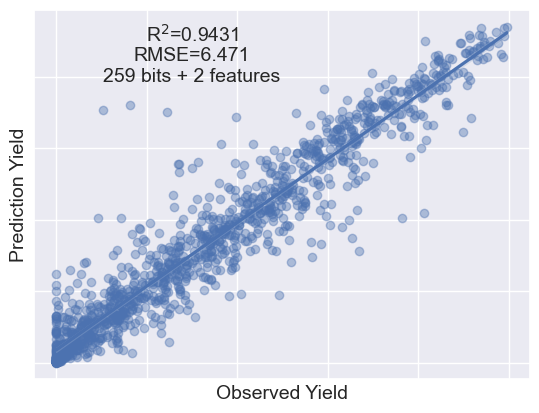

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# example data
x = np.linspace(1,100,100)
y = np.linspace(1,100,100)

# creat plot
sns.set_theme(style="darkgrid")
sns.regplot(x="observed", y="predicted", data=df2, scatter_kws={'alpha':0.4})
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)  # 隐藏刻度标签

# setting
plt.rcParams['font.family'] = 'Arial'
plt.xlabel('Observed Yield',fontsize=14)
plt.ylabel('Prediction Yield',fontsize=14)
plt.text(30, 92, 'R$^2$=0.9431', fontsize=14, va='center', ha='center')
plt.text(30, 86, 'RMSE=6.471', fontsize=14, va='center', ha='center')
plt.text(30, 80, '259 bits + 2 features', fontsize=14,va='center', ha='center')
# saving
plt.savefig('1.png', dpi=600)

In [83]:
np.sqrt(mean_squared_error(y_test, predictions))

6.763887230170363

In [84]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X[train_index]

In [88]:
y[train_index]

array([10.65781182, 18.27868619,  2.47505762, ...,  1.44008073,
       43.53836522, 69.79590237])

In [23]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
np.set_printoptions(threshold=np.inf)
indices
importances[indices]

array([2.74769208e-01, 1.15531121e-01, 1.59862112e-02, 8.56279824e-03,
       8.54581235e-03, 8.37207568e-03, 8.35144029e-03, 8.31785208e-03,
       7.17700502e-03, 6.91105930e-03, 5.82589994e-03, 3.77197258e-03,
       3.33741834e-03, 3.14236622e-03, 2.39952028e-03, 2.09268695e-03,
       2.08389268e-03, 2.03701530e-03, 2.03412576e-03, 1.92017317e-03,
       1.81771181e-03, 1.74473432e-03, 1.66087565e-03, 1.58055921e-03,
       1.56180701e-03, 1.54473672e-03, 1.46802674e-03, 1.46289092e-03,
       1.41753608e-03, 1.40480121e-03, 1.34573662e-03, 1.31505755e-03,
       1.30156957e-03, 1.29437319e-03, 1.23076713e-03, 1.22673654e-03,
       1.20526193e-03, 1.19257271e-03, 1.19228849e-03, 1.16948275e-03,
       1.16142272e-03, 1.14421556e-03, 1.08561133e-03, 1.07164579e-03,
       1.04875302e-03, 1.04829242e-03, 1.02973850e-03, 1.00872131e-03,
       1.00135341e-03, 9.73480212e-04, 9.60413082e-04, 9.56736936e-04,
       9.35472774e-04, 9.35168260e-04, 9.26233240e-04, 9.26045790e-04,
      

In [7]:
df2 = pd.read_csv('PEMF2.csv')
df4 = pd.read_csv('PEMF1.csv')
df4.columns = range(2565)
df2 = df2.loc[:, ~(df2==0).all()]
df2 = df2.dropna(axis=1, how='any')
df2.columns = range(959)
df2[959] = df4[2560]
df2[960] = df4[2561]
df2[961] = df4[2562]
df2[962] = df4[2563]
df2[963] = df4[2564]

,0,1,2,3,4,5,6,7,8,9,...,954,955,956,957,958,959,960,961,962,963
0,0,0,1,0,1,1,0,0,1,1,...,-0.184079,1.473254,-30.575253,-2.206633,-2.459398,0.26,-1.13,-0.70,-1.57,-1.97
1,0,0,1,0,1,1,0,0,1,1,...,-0.184079,1.473254,-73.591857,-2.206633,-2.459398,0.26,-1.13,-0.51,-1.57,-1.97
2,0,0,1,0,1,1,0,0,1,1,...,-0.184079,1.473254,-135.788604,-2.206633,-2.459398,0.26,-1.13,-0.26,-1.57,-1.97
3,0,0,1,0,1,1,0,0,1,1,...,-0.184079,1.473254,-26.232769,-2.206633,-5.248135,0.26,-1.13,-0.69,-1.57,-1.96
4,0,0,1,0,1,1,0,0,1,1,...,-0.184079,1.473254,-60.855900,-2.206633,-5.248135,0.26,-1.13,-0.50,-1.57,-1.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127,1,1,0,1,1,1,1,1,1,0,...,-8.928231,6.730103,-161.008607,-9.196750,-1.617369,-0.73,-1.53,-0.37,-1.62,-1.83
4128,1,1,0,1,1,1,1,1,1,0,...,-8.928231,6.730103,-386.774319,-9.196750,-1.617369,-0.73,-1.53,-0.12,-1.62,-1.83
4129,1,1,0,1,1,1,1,1,1,0,...,-8.928231,6.730103,-1.428639,-9.196750,-0.347658,-0.73,-1.53,-0.56,-1.62,-1.83
4130,1,1,0,1,1,1,1,1,1,0,...,-8.928231,6.730103,-43.931724,-9.196750,-0.347658,-0.73,-1.53,-0.37,-1.62,-1.83


In [213]:
X = df2.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state =42)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1500, max_depth=100, random_state=42)
rf.fit(X_train, y_train)
from sklearn.metrics import r2_score
predictions = rf.predict(X_test)
r2_score(y_test, predictions)

0.94046687162095

In [139]:
df3 = pd.read_csv('modred.csv')
df3.columns = range(5217)
df3[3485]

0      -0.213764
1      -0.213764
2      -0.213764
3      -0.213764
4      -0.213764
          ...   
4127   -0.152115
4128   -0.152115
4129   -0.152115
4130   -0.152115
4131   -0.152115
Name: 3485, Length: 4132, dtype: float64

In [158]:
df4 = pd.read_csv('PEMF1.csv')
df4.columns = range(2565)
df4

,0,1,2,3,4,5,6,7,8,9,...,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564
0,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0.26,-1.13,-0.70,-1.57,-1.97
1,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0.26,-1.13,-0.51,-1.57,-1.97
2,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0.26,-1.13,-0.26,-1.57,-1.97
3,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0.26,-1.13,-0.69,-1.57,-1.96
4,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0.26,-1.13,-0.50,-1.57,-1.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127,1,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,-0.73,-1.53,-0.37,-1.62,-1.83
4128,1,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,-0.73,-1.53,-0.12,-1.62,-1.83
4129,1,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,-0.73,-1.53,-0.56,-1.62,-1.83
4130,1,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,-0.73,-1.53,-0.37,-1.62,-1.83


In [173]:
X1 = df4.iloc[:, 2560:2565].values
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y,test_size=0.3,random_state =42)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1500, max_depth=100, random_state=42)
rf.fit(X_train1, y_train1)
from sklearn.metrics import r2_score
predictions1 = rf.predict(X_test1)
r2_score(y_test1, predictions1)

0.4152382108539854